<a href="https://colab.research.google.com/github/ymirandan/projetosPython/blob/main/DS%3A%20Dimensionalidade%20Dados%20de%20Saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:
Detectar tipo de cancer (maligno ou benigno) de maneira efetiva e eficaz. desejo de detecção rapida e que nao envolva tantas variaveis (paciente iria realizar poucos exames)

# 1 - Importando dados e noções das dimensões

In [39]:
import pandas as pd

resultados_exames = pd.read_csv("/content/exames.csv")

In [40]:
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Foram realizados 33 exames para diagnosticar o paciente.

#2 - Aplicação de Algoritmo

In [41]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id','diagnostico'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y,teste_y, = train_test_split(valores_exames, diagnostico)

Iremos utilizar o algoritmo Random Forest que consiste na aplicação de várias Decision Trees

In [42]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(treino_x, treino_y)

print(classificador.score(teste_x,teste_y)*100)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

como existem celulas vazias (presença de NaN), será necessario transformar a base de dados:

#2.1 - Transformação da base de dados

avaliando se observações estão nulas. se sim, True, se não, False.

In [43]:
resultados_exames.isnull()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [44]:
#somando valores null para ter noção da quantidade de vazios em cada coluna:

resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

existem 419 valores vazios como resposta do exame 33. no total, existem 569 observações.

aproximadamente 70% dos valores da coluna estão vazios, por isso, não iremos trabalhar com ela. é mais facil retira-la da analise e continuar com o Random Forest

In [45]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames_v1 = valores_exames.drop(columns=['exame_33'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y,teste_y, = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(treino_x, treino_y)

print("Resultado da classifficação %.2f%%" %(classificador.score(teste_x,teste_y)*100))

Resultado da classifficação 92.40%


#3 - Validando Algoritmo

Iremos aplicar o dummy classifier para ter uma noção de uma acurácia razoavel, caso classificação não dependesse de um algoritmo sofisticado, fosse defenida de maneira aleatoria. esse será o valor de referencia, o qual iremos comparar com o resultado dos demais algoritmos

In [46]:
from sklearn.dummy import DummyClassifier

SEED=123143

random.seed(SEED)

classificador_bobo = DummyClassifier(strategy='most_frequent')

classificador_bobo.fit(treino_x,treino_y)

print("Resultado da classifficação boba %.2f%%" %(classificador_bobo.score(teste_x,teste_y)*100))

Resultado da classifficação boba 66.67%


A partir desse resultado vemos que o algoritmo Random Forest da maneira como foi aplicado se mostra, de fato, relevante e eficaz.

#4 - Visualizando Dados

transformando dados para visualiza-los mais facilmente

In [47]:
dados_plot = pd.concat([diagnostico,valores_exames_v1.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",var_name="exames", value_name="valores")
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


Iremos limitar o eixo y, padronizando-o para que seja possivel visualizar o comportamento dos valores de cada exame de maneira escalada.

In [48]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_Exames_v2 = padronizador.transform(valores_exames_v1)
valores_Exames_v2 = pd.DataFrame(data = valores_Exames_v2, columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico,valores_Exames_v2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",var_name="exames", value_name="valores")

visualizando dados por meio do grafico de violinos

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

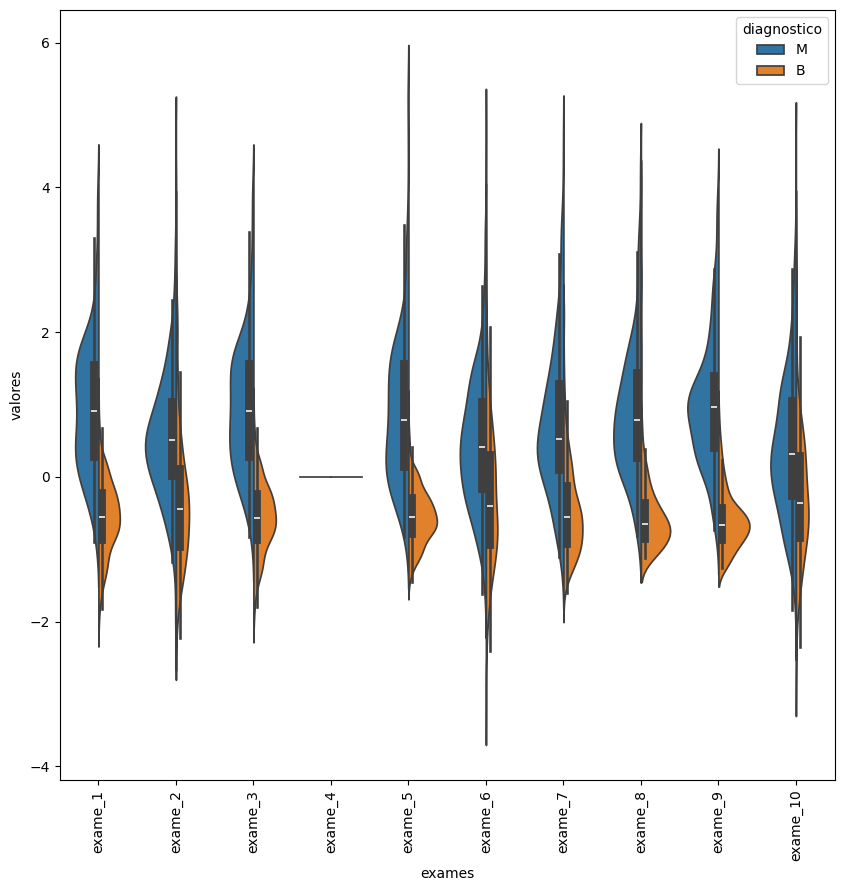

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.violinplot(x= "exames", y = "valores",
               hue = "diagnostico",split=True, data = dados_plot)

plt.xticks(rotation=90)

Vemos que o exame 2 é um bom exame para diferenciar cancers malignos de benignos. o motivo dessa crença é porque o topo da curva laranja (benigno), ou seja, quando mais houve diagnostico benigno, está distante do topo da curva azul (maligno)

por outro lado, o exame 6 apresenta os topos das curvas bem proximos, ou seja, o diagnostico dele é pouco assertivo quanto ao tipo de cancer

com o grafico é facil perceber que o exame 4 não agrega na predição do tipo de cancer, visto que todas as osbervações apresentam o mesmo valor como resposta.

iremos agora visualizar os graficos para os exames 10 ao 21. para facilitar, isso sera feito por meio de uma função:

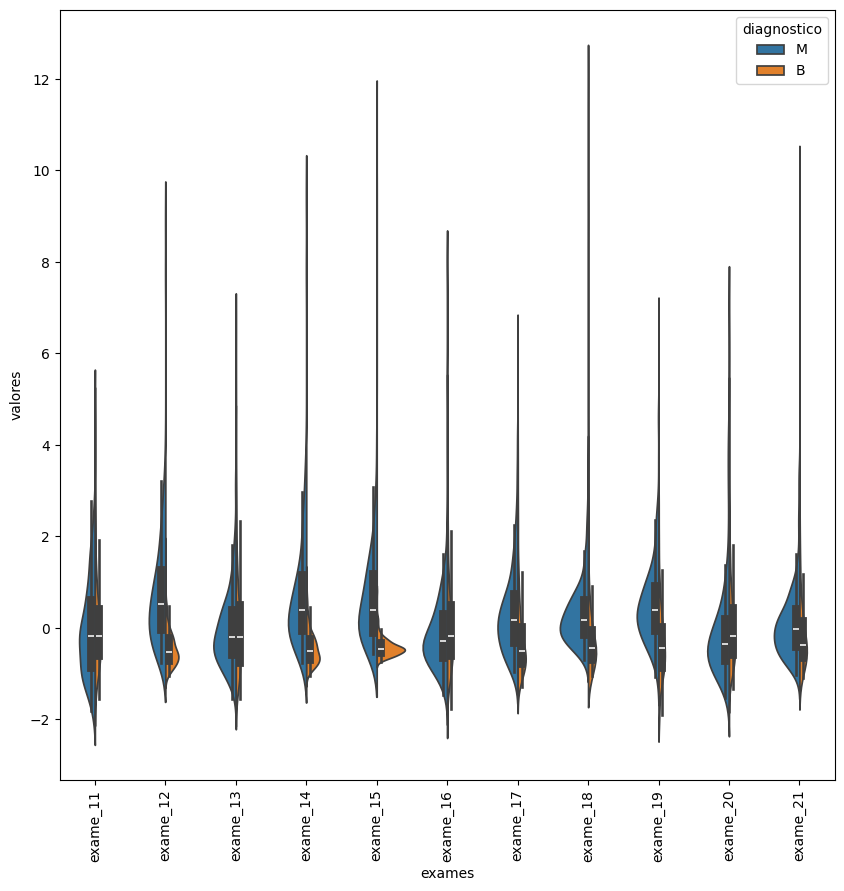

In [50]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico,valores_Exames_v2.iloc[:,inicio:fim]], axis=1)
  dados_plot = pd.melt(dados_plot, id_vars="diagnostico",var_name="exames", value_name="valores")
  plt.figure(figsize=(10,10))
  sns.violinplot(x= "exames", y = "valores",
               hue = "diagnostico",split=True, data = dados_plot)
  plt.xticks(rotation=90)

grafico_violino(valores_Exames_v2,10,21)


agora, visualizando exames de 22 ao 32:

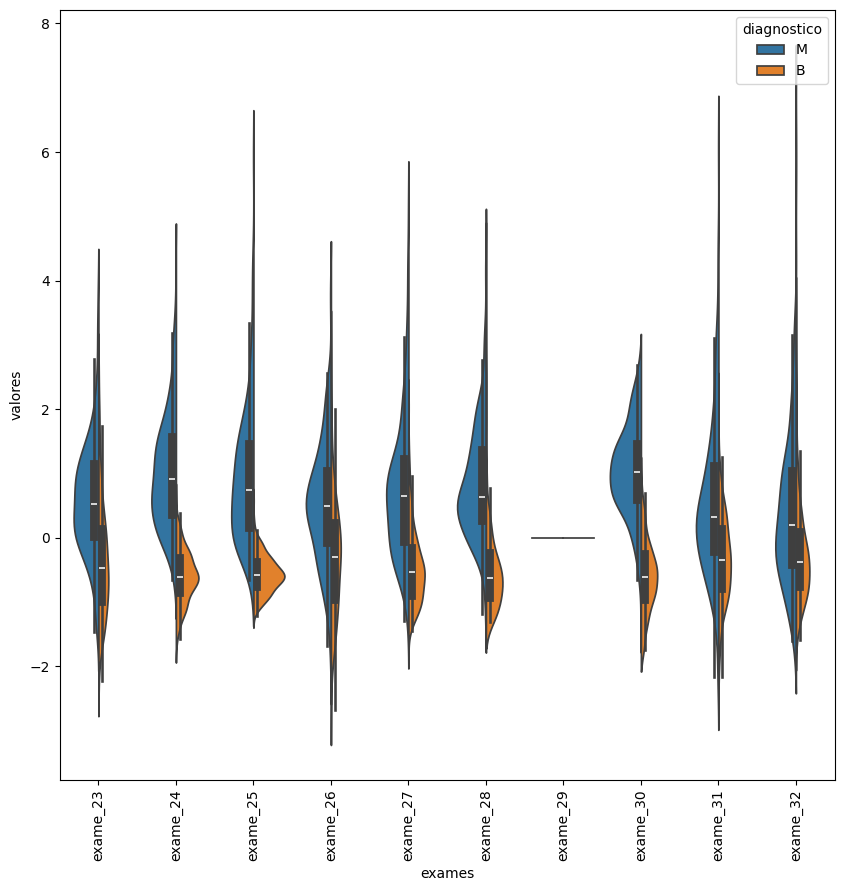

In [51]:
grafico_violino(valores_Exames_v2, 22,32)

a partir dos graficos acima, notamos que algumas colunas possuem valores costantes e nao agregam ao modelo. por isso, elas serao retiradas da base de dados:

In [52]:
valores_exames_v3 = valores_Exames_v2.drop(columns=['exame_4','exame_29'])



agora, iremos classificar o modelo novamente, por meio de uma função:

In [53]:
def classificar(valores):
  SEED =123143
  random.seed(SEED)
  treino_x,teste_x,treno_y,teste_y = train_test_split(valores, diagnostico, test_size = 0.3)
  classificador = RandomForestClassifier(n_estimators = 100)
  classificador.fit(treino_x,treino_y)
  print("Resultado da classsificação: %.2f%%" %(classificador.score(teste_x,teste_y)*100))

classificar(valores_exames_v3)

Resultado da classsificação: 91.81%


Classificação se mantem em torno de 90% e dessa vez é realizada com dimensão menor, ou seja, mais eficaz.

#5 - Cálculo da Matriz de Correlação

a matriz de correlação nos mostrará quais variaveis estao altamente correlacionadas, indicando possibilidade de retirar uma delas. desse modo, a dimensao do modelo diminui e os resultados continuam satisfatorio, visto que a variavel que foi retirada tenderia à mesma conclusão que a variavel que é correlacionada a ela e foi mantida no modelo. fazemos entao:

In [54]:
valores_exames_v3.corr().head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


visualmente, não é interessante avaliar a correlação por meio da tabela acima. por isso, faremos um mapa de calor:

<Axes: >

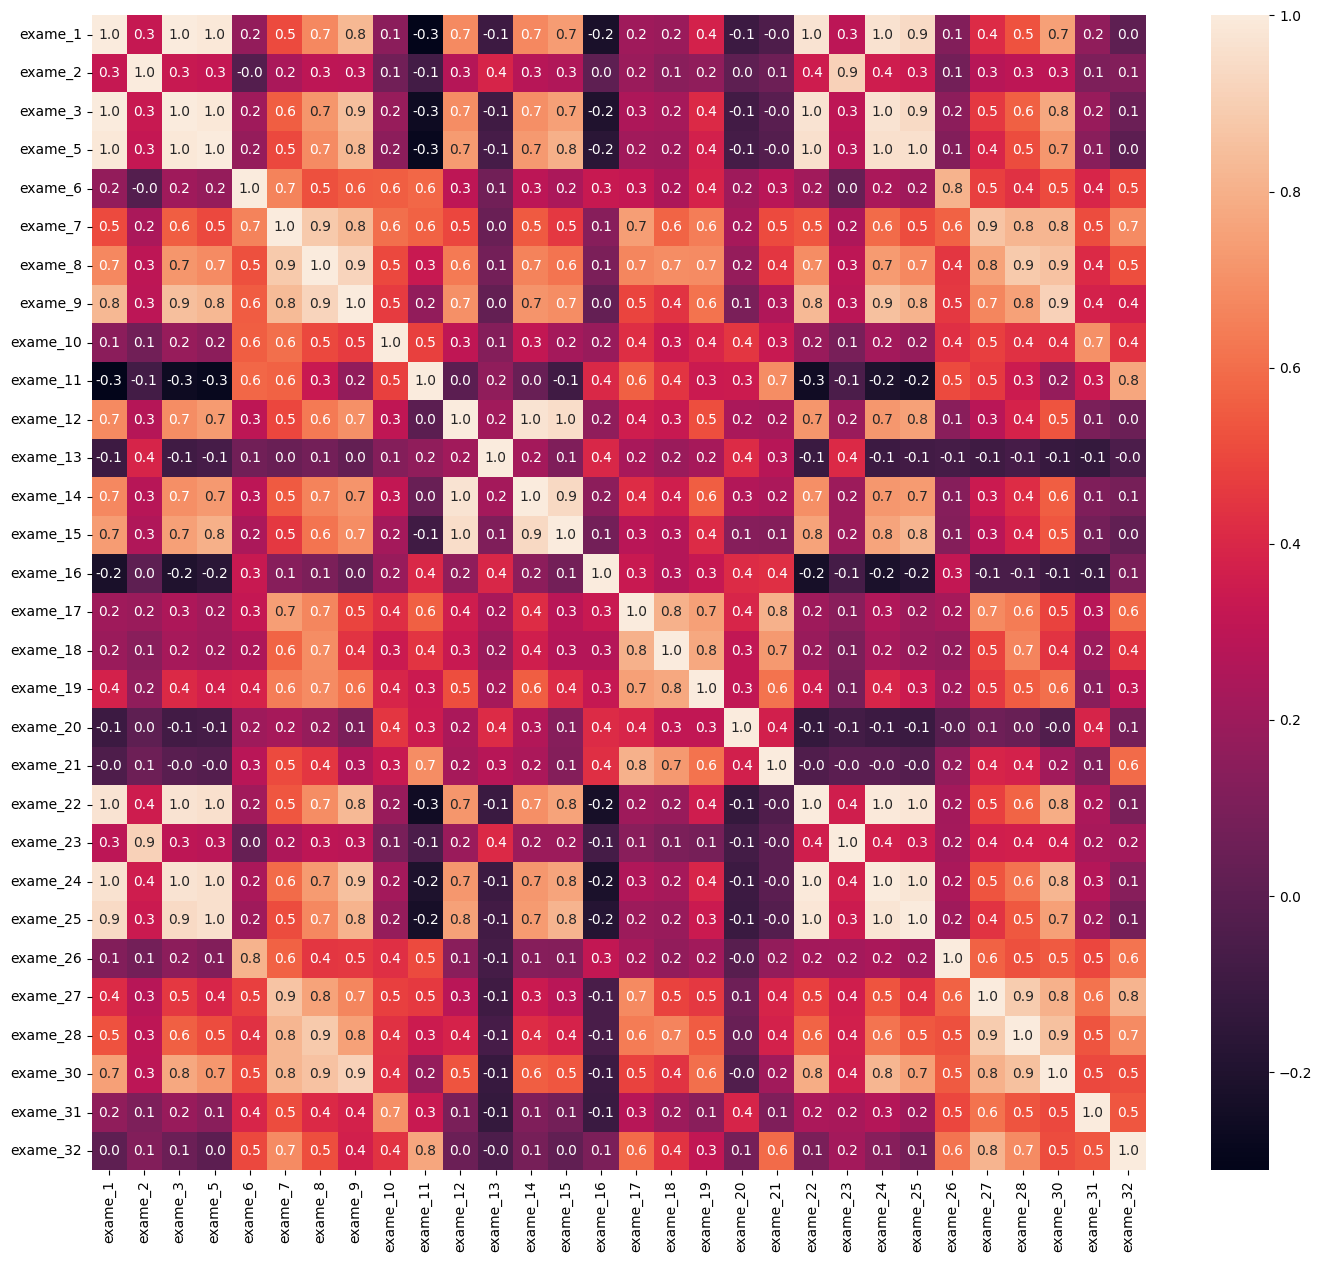

In [55]:
matriz_correlacao = valores_exames_v3.corr()

plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt=".1f")

In [56]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao >0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum() #exames com valores maiores que 1 possui altas correlacoes
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

excluindo exames 3 e 24 da base de dados:

In [57]:
valores_exames_v4 = valores_exames_v3.drop(columns=["exame_3","exame_24"])

classificando o modelo novamente:

In [58]:
classificar(valores_exames_v4)

Resultado da classsificação: 92.98%


analogamente, o modelo se mantem relevante e com menos exames sendo necessarios para qualificar o cancer.

# 6 - Selecionando Melhores Features (Variaveis)

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k=5)

aqui, o criterio de seleção para escolha das melhores variaveis explicativas, ou seja, os melhores exames, será o indicador Chi Quadrado. a quantidade k de features para serem escolhidas será 5

In [60]:
treino_x,teste_x,treno_y,teste_y = train_test_split(valores_exames_v4, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(treino_x,treino_y)

ValueError: Input X must be non-negative.

valores não podem ser negativos, por isso pegaremos conjunto de dados original, com exceção das variaveis que foram retiradas ao longo do relatorio

In [65]:
valores_exames_v5 = valores_exames_v1.drop(columns=(["exame_3","exame_4","exame_24","exame_29"]))

SEED=1234
random.seed(SEED)

treino_x,teste_x,treino_y,teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(treino_x,treino_y)

treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

treino_kbest.shape

(398, 5)

In [66]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest,treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest,teste_y)*100))

Resultado da classificação 92.40%


#7 - Matriz de Confusão

In [67]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

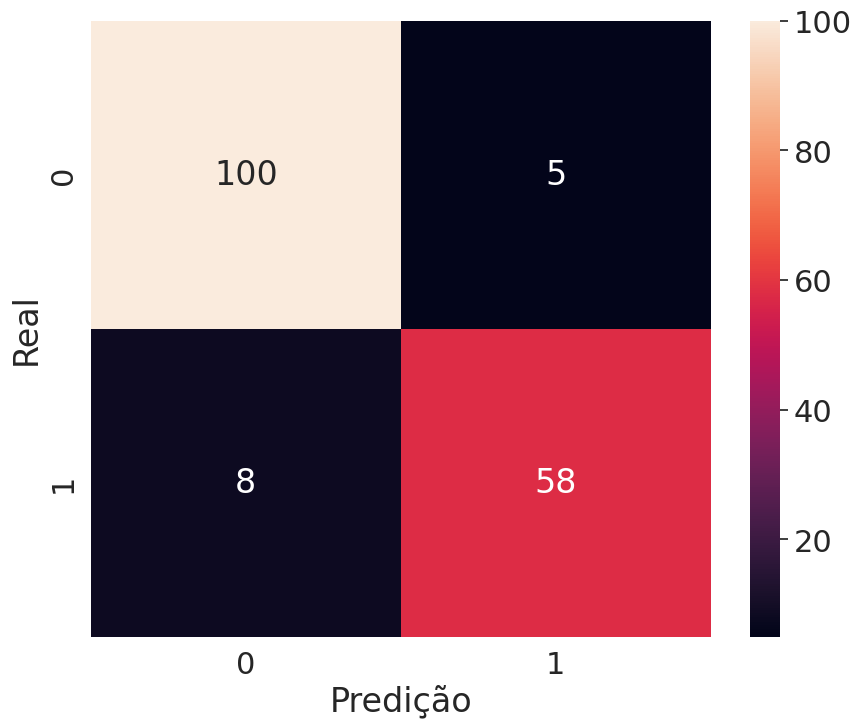

In [70]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao,annot=True, fmt="d").set(xlabel="Predição",ylabel= "Real")

vemos que a maior parte dos valores está na diagonal principal, ou seja, os valores previstos coicidem com os reais. Vemos que menos de 10% dos casos estão sendo classificados erroneamente.

Ademais, apenas 8 dos diagnosticos (4%) foram falsos negativos.

#8 - Algoritmo RFE

Resultado da classificação 90.06%


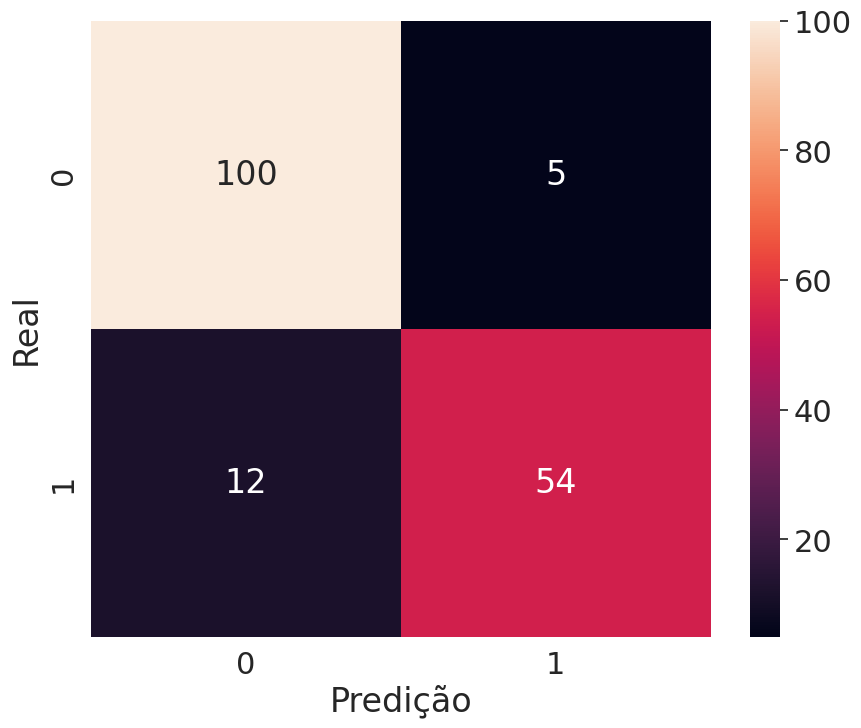

In [74]:
from sklearn.feature_selection import RFE

SEED=1234
random.seed(SEED)

treino_x,teste_x,treino_y,teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x,treino_y)

selecionador_rfe = RFE(estimator=classificador, n_features_to_select = 5, step=1)
selecionador_rfe.fit(treino_x,treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe,treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao,annot=True,fmt="d").set(xlabel="Predição",ylabel="Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe,teste_y)*100))


percebemos maior erro na predição do diagnostico falso. aumento de 50% em relação ao falso negativo anterior.

#8 - Aplicando Algoritmo RFECV

Resultado da classificação 92.98%


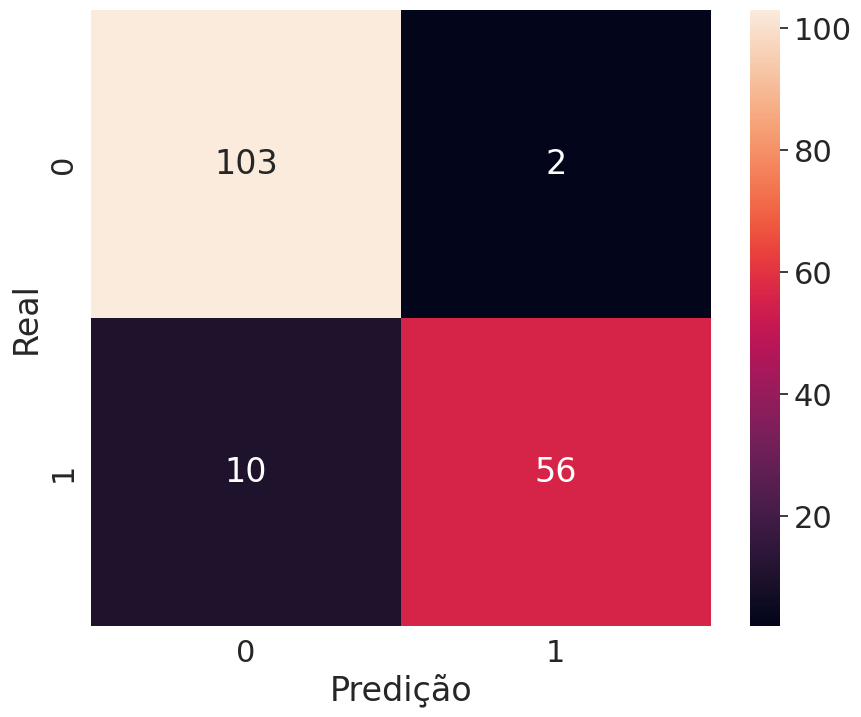

In [76]:
from sklearn.feature_selection import RFECV

SEED=1234
random.seed(SEED)

treino_x,teste_x,treino_y,teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x,treino_y)

selecionador_rfecv = RFECV(estimator=classificador, cv=5,step=1,scoring="accuracy")
selecionador_rfecv.fit(treino_x,treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador.fit(treino_rfecv,treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao,annot=True,fmt="d").set(xlabel="Predição",ylabel="Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv,teste_y)*100))


In [77]:
treino_x.columns[selecionador_rfecv.support_] #vendo as variaveis selecionadas

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [87]:
# esse codigo so é possivel de rodar com uma versao anterior do scikit learn, por isso, ele ficara comentado
#plt.figure(figsize=(14,8))
#plt.xlabel("Numero de exames")
#plt.ylabel("Acuracia")
#sns.set()
#plt.plot(range(1, len(selecionador_rfecv.grid_scores_) +1), selecionador_rfecv.grid_scores_)
#plt.show()

#9 - Visualizando diagnosticos do exame 1 e exame 2

<Axes: xlabel='Exame 1', ylabel='Exame 2'>

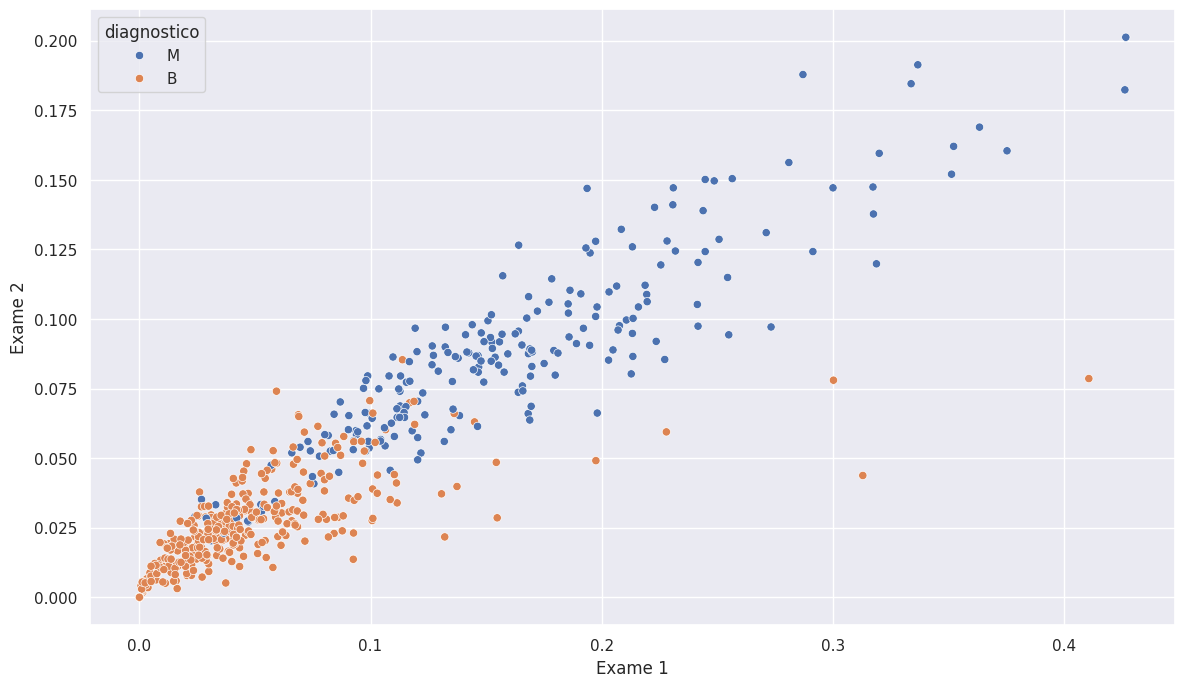

In [92]:
valores_exames_v6 = selecionador_rfe.transform(valores_exames_v5)
plt.figure(figsize=(14,8))
plt.xlabel("Exame 1")
plt.ylabel("Exame 2")
sns.scatterplot(x=valores_exames_v6[:,0],y=valores_exames_v6[:,1],hue=diagnostico)

#10 - Aplicando Algoritmo PCA

<Axes: xlabel='Exame 1', ylabel='Exame 2'>

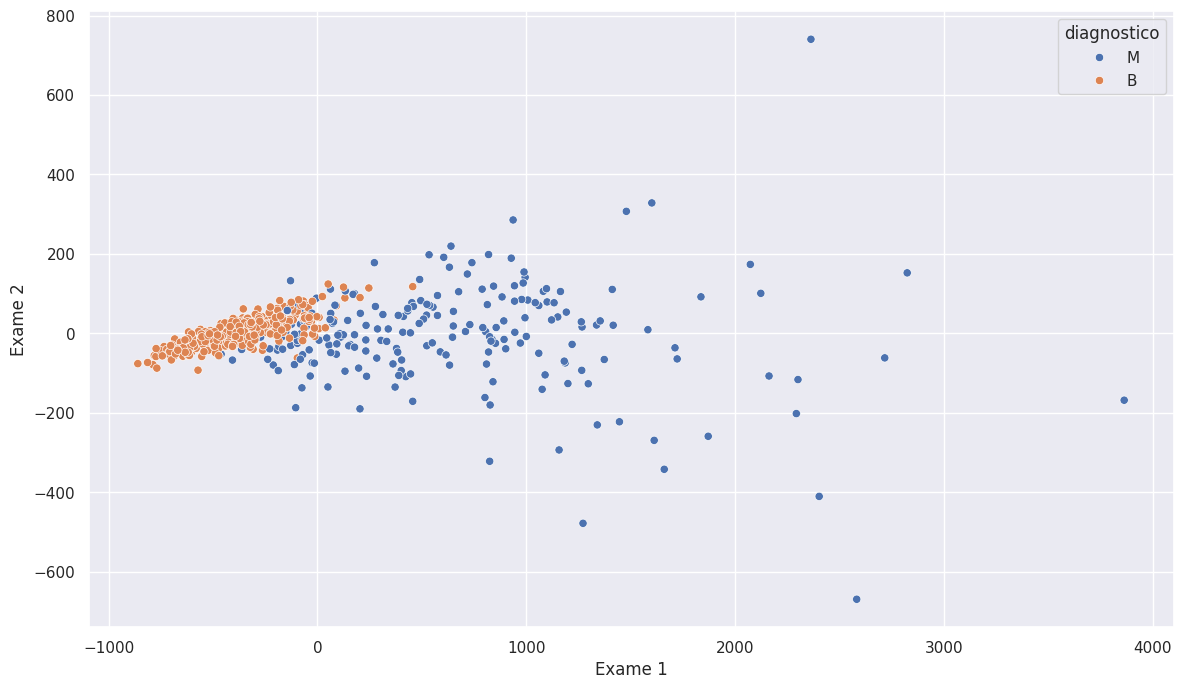

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
valores_exames_v7 = pca.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
plt.xlabel("Exame 1")
plt.ylabel("Exame 2")
sns.scatterplot(x=valores_exames_v7[:,0],y=valores_exames_v7[:,1],hue=diagnostico)

#11 - Aplicando TSNE

<Axes: xlabel='Exame 1', ylabel='Exame 2'>

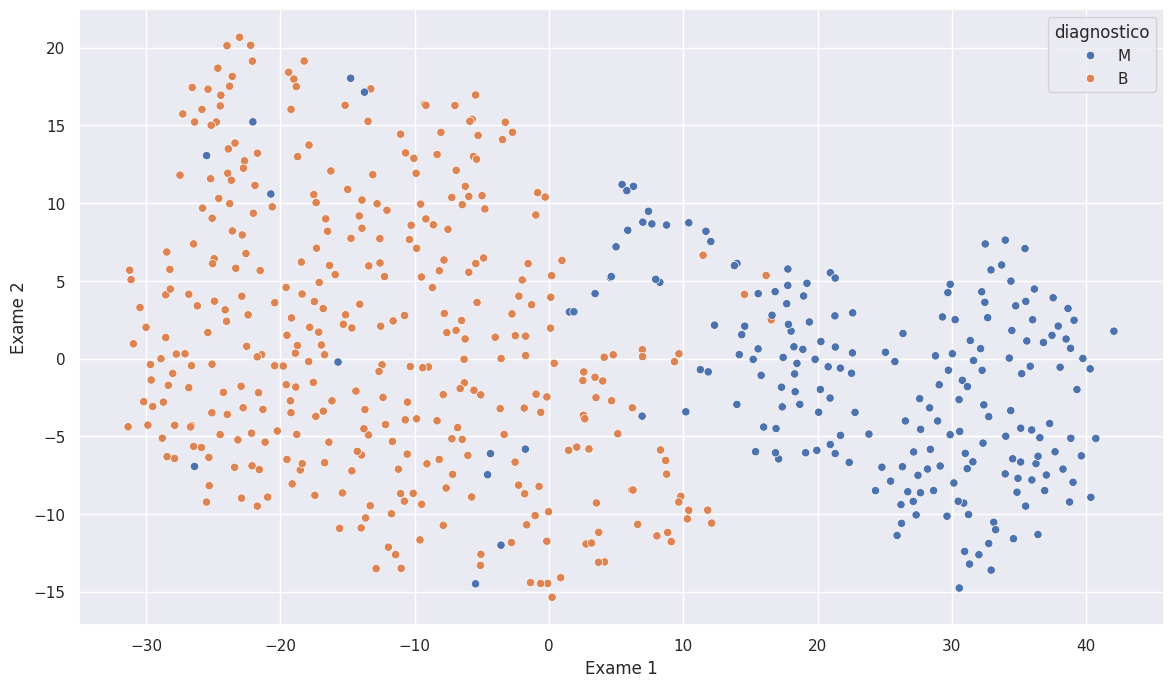

In [95]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
valores_exames_v8 = tsne.fit_transform(valores_exames_v4)
plt.figure(figsize=(14,8))
plt.xlabel("Exame 1")
plt.ylabel("Exame 2")
sns.scatterplot(x=valores_exames_v8[:,0],y=valores_exames_v8[:,1],hue=diagnostico)